### Import modules

In [ ]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np
import xtrack as xt
import matplotlib 
import numpy as np
import PyNAFF as pnf
import matplotlib.pyplot as plt

# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'



### Collider 2023, 0.5/0.5, 62.313/60.320

In [ ]:
# Define study
STUDY_NAME = "tune_scan_2023"
COLLIDER = "collider_00"
JOB = "xtrack_0215"
TITLE_STUDY = 'run III 2023'
INITIAL_TUNE = (0.313, 0.320)
INITIAL_BETA = (0.48, 0.48)
COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/{JOB}/collider.json"


In [ ]:
# Load collider
collider = xt.Multiline.from_json(COLLIDER_PATH)
collider.build_trackers()

In [ ]:
# Compute footprint
fp = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns=2000,
    #linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal=True,
    keep_tracking_data = True,
)

In [ ]:
# Postprocess footprint
signal = fp.tracking_data.x[-10,:]
signal = fp.tracking_data.y[-10,:]
qx_pynaff = []
qy_pynaff = []
(my_len,_) = np.shape(fp.tracking_data.x)
for ii in range(my_len):   
    signal = fp.tracking_data.x[ii,:]
    qx_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    signal = fp.tracking_data.y[ii,:]
    qy_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])

In [ ]:
# Plot footprint
fp.plot(color='r',linewidth=0, marker='o', markersize=3, label='Xsuite')
plt.plot(qx_pynaff, qy_pynaff,'.',color='b', markersize=3, label='PyNAFF')
plt.plot([.3,.32],[.3,.32],'-')
plt.scatter(INITIAL_TUNE[0], INITIAL_TUNE[1], marker='x', color='g', s=100, label='Tune before bb')
plt.title(f'Footprint for {TITLE_STUDY}, ' + r'$\beta_{x/y} =$' + f'{INITIAL_BETA[0]}/{INITIAL_BETA[1]}')
plt.legend()
plt.grid()
plt.show()

### Collider 2023, 0.3/0.3, 62.314/60.319

In [ ]:
# Define study
STUDY_NAME = "tune_scan_2023_bis"
COLLIDER = "collider_00"
JOB = "xtrack_0239"
TITLE_STUDY = 'run III 2023'
INITIAL_TUNE = (0.314, 0.319)
INITIAL_BETA = (0.3, 0.3)
COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/{JOB}/collider.json"


# Load collider
collider = xt.Multiline.from_json(COLLIDER_PATH)
collider.build_trackers()

# Compute footprint
fp = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns=2000,
    #linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal=True,
    keep_tracking_data = True,
)

# Postprocess footprint
signal = fp.tracking_data.x[-10,:]
signal = fp.tracking_data.y[-10,:]
qx_pynaff = []
qy_pynaff = []
(my_len,_) = np.shape(fp.tracking_data.x)
for ii in range(my_len):   
    signal = fp.tracking_data.x[ii,:]
    qx_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    signal = fp.tracking_data.y[ii,:]
    qy_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    
# Plot footprint
fp.plot(color='r',linewidth=0, marker='o', markersize=3, label='Xsuite')
plt.plot(qx_pynaff, qy_pynaff,'.',color='b', markersize=3, label='PyNAFF')
plt.plot([.3,.32],[.3,.32],'-')
plt.scatter(INITIAL_TUNE[0], INITIAL_TUNE[1], marker='x', color='g', s=100, label='Tune before bb')
plt.title(f'Footprint for {TITLE_STUDY}, ' + r'$\beta_{x/y} =$' + f'{INITIAL_BETA[0]}/{INITIAL_BETA[1]}')
plt.legend()
plt.grid()
plt.show()

### Collider 2023, 0.2/0.2, 62.313/60.318

In [ ]:
# Define study
STUDY_NAME = "tune_scan_2023"
COLLIDER = "collider_01"
JOB = "xtrack_0188"
TITLE_STUDY = 'run III 2023'
INITIAL_TUNE = (0.313, 0.318)
INITIAL_BETA = (0.2, 0.2)
COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/{JOB}/collider.json"


# Load collider
collider = xt.Multiline.from_json(COLLIDER_PATH)
collider.build_trackers()

# Compute footprint
fp = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns=2000,
    #linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal=True,
    keep_tracking_data = True,
)

# Postprocess footprint
signal = fp.tracking_data.x[-10,:]
signal = fp.tracking_data.y[-10,:]
qx_pynaff = []
qy_pynaff = []
(my_len,_) = np.shape(fp.tracking_data.x)
for ii in range(my_len):   
    signal = fp.tracking_data.x[ii,:]
    qx_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    signal = fp.tracking_data.y[ii,:]
    qy_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    
# Plot footprint
fp.plot(color='r',linewidth=0, marker='o', markersize=3, label='Xsuite')
plt.plot(qx_pynaff, qy_pynaff,'.',color='b', markersize=3, label='PyNAFF')
plt.plot([.3,.32],[.3,.32],'-')
plt.scatter(INITIAL_TUNE[0], INITIAL_TUNE[1], marker='x', color='g', s=100, label='Tune before bb')
plt.title(f'Footprint for {TITLE_STUDY}, ' + r'$\beta_{x/y} =$' + f'{INITIAL_BETA[0]}/{INITIAL_BETA[1]}')
plt.legend()
plt.grid()
plt.show()

### Collider 2024, 0.5/0.5, 62.313/60.320

In [ ]:
# Define study
STUDY_NAME = "tune_scan_2024"
COLLIDER = "collider_00"
JOB = "xtrack_0215"
TITLE_STUDY = 'run III 2024'
INITIAL_TUNE = (0.313, 0.320)
INITIAL_BETA = (0.5, 0.5)
COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/{JOB}/collider.json"


# Load collider
collider = xt.Multiline.from_json(COLLIDER_PATH)
collider.build_trackers()

# Compute footprint
fp = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns=2000,
    #linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal=True,
    keep_tracking_data = True,
)

# Postprocess footprint
signal = fp.tracking_data.x[-10,:]
signal = fp.tracking_data.y[-10,:]
qx_pynaff = []
qy_pynaff = []
(my_len,_) = np.shape(fp.tracking_data.x)
for ii in range(my_len):   
    signal = fp.tracking_data.x[ii,:]
    qx_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    signal = fp.tracking_data.y[ii,:]
    qy_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    
# Plot footprint
fp.plot(color='r',linewidth=0, marker='o', markersize=3, label='Xsuite')
plt.plot(qx_pynaff, qy_pynaff,'.',color='b', markersize=3, label='PyNAFF')
plt.plot([.3,.32],[.3,.32],'-')
plt.scatter(INITIAL_TUNE[0], INITIAL_TUNE[1], marker='x', color='g', s=100, label='Tune before bb')
plt.title(f'Footprint for {TITLE_STUDY}, ' + r'$\beta_{x/y} =$' + f'{INITIAL_BETA[0]}/{INITIAL_BETA[1]}')
plt.legend()
plt.grid()
plt.show()

### Collider 2024, 0.5/0.15, 0.316/0.323, I = 300

In [ ]:
# Define study
STUDY_NAME = "tune_scan_2024"
COLLIDER = "collider_01"
JOB = "xtrack_0293"
TITLE_STUDY = 'run III 2024'
INITIAL_TUNE = (0.316, 0.323)
INITIAL_BETA = (0.5, 0.15)
I = 300
COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/{JOB}/collider.json"


# Load collider
collider = xt.Multiline.from_json(COLLIDER_PATH)
collider.build_trackers()

# Compute footprint
fp = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns=2000,
    #linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal=True,
    keep_tracking_data = True,
)

# Postprocess footprint
signal = fp.tracking_data.x[-10,:]
signal = fp.tracking_data.y[-10,:]
qx_pynaff = []
qy_pynaff = []
(my_len,_) = np.shape(fp.tracking_data.x)
for ii in range(my_len):   
    signal = fp.tracking_data.x[ii,:]
    qx_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    signal = fp.tracking_data.y[ii,:]
    qy_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    
# Plot footprint
fp.plot(color='r',linewidth=0, marker='o', markersize=3, label='Xsuite')
plt.plot(qx_pynaff, qy_pynaff,'.',color='b', markersize=3, label='PyNAFF')
plt.plot([.3,.32],[.3,.32],'-')
plt.scatter(INITIAL_TUNE[0], INITIAL_TUNE[1], marker='x', color='g', s=100, label='Tune before bb')
plt.title(f'Footprint for {TITLE_STUDY}, ' + r'$\beta_{x/y} =$' + f'{INITIAL_BETA[0]}/{INITIAL_BETA[1]},' + f'I={I} A')
plt.legend()
plt.grid()
plt.show()

### Collider 2024, 0.5/0.15, 62.319/60.325, I = 0

Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Compiling ContextCpu kernels...


66c3b46f92894a9e85d4422502dea515.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 66c3b46f92894a9e85d4422502dea515.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


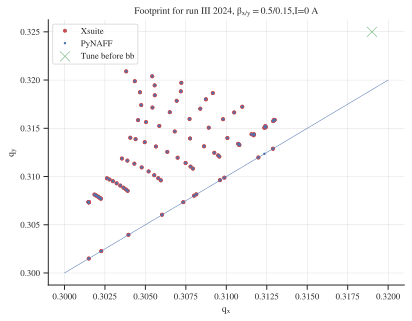

In [11]:
# Define study
STUDY_NAME = "tune_scan_2024_bis"
COLLIDER = "collider_00"
JOB = "xtrack_1111"
TITLE_STUDY = 'run III 2024'
INITIAL_TUNE = (0.319, 0.325)
INITIAL_BETA = (0.5, 0.15)
I = 0
COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/{JOB}/collider.json"


# Load collider
collider = xt.Multiline.from_json(COLLIDER_PATH)
collider.build_trackers()

# Compute footprint
fp = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns=2000,
    #linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal=True,
    keep_tracking_data = True,
)

# Postprocess footprint
signal = fp.tracking_data.x[-10,:]
signal = fp.tracking_data.y[-10,:]
qx_pynaff = []
qy_pynaff = []
(my_len,_) = np.shape(fp.tracking_data.x)
for ii in range(my_len):   
    signal = fp.tracking_data.x[ii,:]
    qx_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    signal = fp.tracking_data.y[ii,:]
    qy_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    
# Plot footprint
fp.plot(color='r',linewidth=0, marker='o', markersize=3, label='Xsuite')
plt.plot(qx_pynaff, qy_pynaff,'.',color='b', markersize=3, label='PyNAFF')
plt.plot([.3,.32],[.3,.32],'-')
plt.scatter(INITIAL_TUNE[0], INITIAL_TUNE[1], marker='x', color='g', s=100, label='Tune before bb')
plt.title(f'Footprint for {TITLE_STUDY}, ' + r'$\beta_{x/y} =$' + f'{INITIAL_BETA[0]}/{INITIAL_BETA[1]},' + f'I={I} A')
plt.legend()
plt.grid()
plt.show()

### Collider 2024, 0.5/0.15, 62.324/60.329, I = -600

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_bb3d`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Compiling ContextCpu kernels...


510f60ce0b5242448794bfef0841f1db.c:4394: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 510f60ce0b5242448794bfef0841f1db.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Computing footprint...
Done computing footprint.


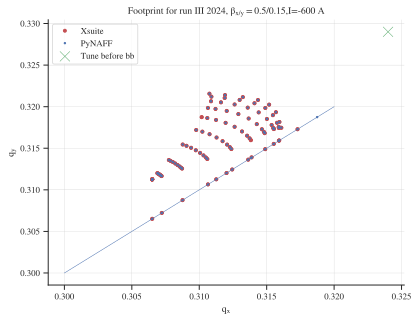

In [12]:
# Define study
STUDY_NAME = "tune_scan_2024_bis"
COLLIDER = "collider_00"
JOB = "xtrack_1497"
TITLE_STUDY = 'run III 2024'
INITIAL_TUNE = (0.324, 0.329)
INITIAL_BETA = (0.5, 0.15)
I = -600
COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/{JOB}/collider.json"


# Load collider
collider = xt.Multiline.from_json(COLLIDER_PATH)
collider.build_trackers()

# Compute footprint
fp = collider["lhcb1"].get_footprint(
    nemitt_x=2.2e-6,
    nemitt_y=2.2e-6,
    n_turns=2000,
    #linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.1)],
    freeze_longitudinal=True,
    keep_tracking_data = True,
)

# Postprocess footprint
signal = fp.tracking_data.x[-10,:]
signal = fp.tracking_data.y[-10,:]
qx_pynaff = []
qy_pynaff = []
(my_len,_) = np.shape(fp.tracking_data.x)
for ii in range(my_len):   
    signal = fp.tracking_data.x[ii,:]
    qx_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    signal = fp.tracking_data.y[ii,:]
    qy_pynaff.append(pnf.naff(signal, fp.n_turns, 1, 0 , False)[0][1])
    
# Plot footprint
fp.plot(color='r',linewidth=0, marker='o', markersize=3, label='Xsuite')
plt.plot(qx_pynaff, qy_pynaff,'.',color='b', markersize=3, label='PyNAFF')
plt.plot([.3,.32],[.3,.32],'-')
plt.scatter(INITIAL_TUNE[0], INITIAL_TUNE[1], marker='x', color='g', s=100, label='Tune before bb')
plt.title(f'Footprint for {TITLE_STUDY}, ' + r'$\beta_{x/y} =$' + f'{INITIAL_BETA[0]}/{INITIAL_BETA[1]},' + f'I={I} A')
plt.legend()
plt.grid()
plt.show()